# Problem statement:
A) Data merging

B) Data cleaning

C) Use relevant ML models to predict:

   1. Customer retention 

   2. Classify customers 

   3. Product recommendation

   4. Revenue optimization

In [1691]:
#Importing necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# LOADING AND CLEANING OUR DATA

In [1692]:
#Nigeria Data
#nc(nigeria customers)
nc = pd.read_csv(r'C:\Users\Spectre\Downloads\Nigeria Customers.csv')

#no(nigeria orders)
no =pd.read_csv(r'C:\Users\Spectre\Downloads\Nigeria Orders.csv')

#nd (nigeria deliveries)
nd = pd.read_csv(r'C:\Users\Spectre\Downloads\Nigeria Deliveries.csv')

In [1693]:
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer ID          1095 non-null   int64  
 1   Last Used Platform   1095 non-null   object 
 2   Is Blocked           1095 non-null   int64  
 3   Created At           1095 non-null   object 
 4   Language             1095 non-null   object 
 5   Outstanding Amount   1095 non-null   int64  
 6   Loyalty Points       1095 non-null   int64  
 7   Number of Employees  605 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 68.6+ KB


In [1694]:
no.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Order ID                  1429 non-null   int64  
 1   Order Status              1429 non-null   object 
 2   Category Name             1429 non-null   object 
 3   SKU                       1429 non-null   object 
 4   Customization Group       0 non-null      float64
 5   Customization Option      0 non-null      float64
 6   Quantity                  1429 non-null   int64  
 7   Unit Price                1429 non-null   int64  
 8   Cost Price                1429 non-null   int64  
 9   Total Cost Price          1429 non-null   int64  
 10  Total Price               1429 non-null   int64  
 11  Order Total               1429 non-null   float64
 12  Sub Total                 1429 non-null   int64  
 13  Tax                       1429 non-null   object 
 14  Delivery

In [1695]:
nd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8019 entries, 0 to 8018
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Task_ID                8019 non-null   int64  
 1   Order_ID               8019 non-null   object 
 2   Relationship           8019 non-null   float64
 3   Team_Name              8019 non-null   object 
 4   Task_Type              8019 non-null   object 
 5   Notes                  7 non-null      object 
 6   Agent_ID               8019 non-null   object 
 7   Distance(m)            8019 non-null   object 
 8   Total_Time_Taken(min)  8019 non-null   object 
 9   Pick_up_From           8019 non-null   object 
 10  Start_Before           8019 non-null   object 
 11  Complete_Before        8019 non-null   object 
 12  Completion_Time        8019 non-null   object 
 13  Task_Status            8019 non-null   object 
 14  Ref_Images             8019 non-null   object 
 15  Rati

In [1696]:
nc.head()

,Customer ID,Last Used Platform,Is Blocked,Created At,Language,Outstanding Amount,Loyalty Points,Number of Employees
0,3922702,WEB,0,2021-07-12T08:06:47.000Z,en,0,0,NaN
1,4058001,WEB,0,2021-08-05T08:22:35.000Z,en,0,0,NaN
2,4058334,WEB,0,2021-08-05T09:38:09.000Z,en,0,0,NaN
3,4058414,WEB,0,2021-08-05T09:56:57.000Z,en,0,0,NaN
4,4058431,WEB,0,2021-08-05T09:59:51.000Z,en,0,0,NaN


In [1697]:
nc['Is Blocked'].value_counts()

0    1095
Name: Is Blocked, dtype: int64

In [1698]:
nc['Outstanding Amount'].value_counts()

0    1095
Name: Outstanding Amount, dtype: int64

In [1699]:
nc['Loyalty Points'].value_counts()

0       563
50       26
41       25
10       24
42       19
       ... 
260       1
6145      1
4459      1
297       1
2040      1
Name: Loyalty Points, Length: 269, dtype: int64

In [1700]:
nc['Number of Employees'].value_counts()

3.000000e+00    154
2.000000e+00    141
4.000000e+00     98
5.000000e+00     42
1.000000e+00     33
               ... 
7.056342e+09      1
3.500000e+01      1
8.088813e+09      1
9.090346e+09      1
8.188470e+09      1
Name: Number of Employees, Length: 83, dtype: int64

In [1701]:
nc.isnull().sum()

Customer ID              0
Last Used Platform       0
Is Blocked               0
Created At               0
Language                 0
Outstanding Amount       0
Loyalty Points           0
Number of Employees    490
dtype: int64

In [1702]:
#Data cleaning for nigeria customers data

nc = nc.drop('Number of Employees', axis = 1)

#To remove junk data that we won't use in our model we will remove the following columns(Is Blocked,Outstanding Amount)
nc = nc.drop(['Is Blocked','Outstanding Amount'], axis = 1)

#We can also remove the Language column
nc = nc.drop('Language', axis = 1)

In [1703]:
nc.columns

Index(['Customer ID', 'Last Used Platform', 'Created At', 'Loyalty Points'], dtype='object')

In [1704]:
no.head()

,Order ID,Order Status,Category Name,SKU,Customization Group,Customization Option,Quantity,Unit Price,Cost Price,Total Cost Price,...,Merchant Earning,Commission Amount,Commission Payout Status,Order Preparation Time,Redeemed Loyalty Points,Consumed Loyalty Points,Cancellation Reason,Flat Discount,Checkout Template Name,Checkout Template Value
0,11262518,ORDERED,Flour & Sugar,KNFS0001,NaN,NaN,5,20850,20370,101850,...,NaN,NaN,NaN,0,-,-,NaN,0,-,-
1,11262518,ORDERED,Spreads,KNSP2001,NaN,NaN,1,325,300,300,...,NaN,NaN,NaN,0,-,-,NaN,0,-,-
2,11261796,DISPATCHED,Flour & Sugar,KNFS0001,NaN,NaN,5,20850,20370,101850,...,NaN,NaN,NaN,0,-,-,NaN,0,-,-
3,11261796,DISPATCHED,Spreads,KNSP2001,NaN,NaN,1,325,300,300,...,NaN,NaN,NaN,0,-,-,NaN,0,-,-
4,11261341,ORDERED,Spreads,KNSP2001,NaN,NaN,6,325,300,1800,...,NaN,NaN,NaN,0,-,-,NaN,0,-,-


In [1705]:
no['Order Status'].value_counts()

COMPLETED     1126
CANCELLED      223
ORDERED         75
DISPATCHED       5
Name: Order Status, dtype: int64

In [1706]:
no['SKU'].value_counts()

KNFS0001    628
KNFS0201    118
KNFS1101     66
KNCO0101     45
KNRC0201     34
           ... 
KNSS0300      1
KNFS0501      1
KNFS0202      1
KNSP0002      1
KNVG0069      1
Name: SKU, Length: 94, dtype: int64

In [1707]:
no['Redeemed Loyalty Points'].value_counts()

-       924
200     104
500      48
1000     35
100      34
       ... 
2499      1
210       1
3200      1
620       1
20        1
Name: Redeemed Loyalty Points, Length: 70, dtype: int64

In [1708]:
no['Consumed Loyalty Points'].value_counts()

-       309
41      100
83       81
125      63
417      44
       ... 
61        1
69        1
1260      1
926       1
209       1
Name: Consumed Loyalty Points, Length: 185, dtype: int64

In [1709]:
no['Cancellation Reason'].value_counts()

Series([], Name: Cancellation Reason, dtype: int64)

In [1710]:
#Remove junk columns
no = no.drop(['Customization Group','Customization Option','SKU','Order Total','Merchant Earning','Commission Amount','Commission Payout Status','Order Preparation Time','Cancellation Reason','Flat Discount','Checkout Template Name','Checkout Template Value'], axis = 1)

In [1711]:
no.columns

Index(['Order ID', 'Order Status', 'Category Name', 'Quantity', 'Unit Price',
       'Cost Price', 'Total Cost Price', 'Total Price', 'Sub Total', 'Tax',
       'Delivery Charge', 'Tip', 'Discount', 'Remaining Balance',
       'Payment Method', 'Additional Charge', 'Taxable Amount',
       'Transaction ID', 'Currency Symbol', 'Transaction Status', 'Promo Code',
       'Customer ID', 'Merchant ID', 'Store Name', 'Pickup Address',
       'Description', 'Distance (in km)', 'Order Time', 'Pickup Time',
       'Delivery Time', 'Ratings', 'Reviews', 'Redeemed Loyalty Points',
       'Consumed Loyalty Points'],
      dtype='object')

In [1712]:
no['Payment Method'].value_counts()

CASH         1421
Pay Later       8
Name: Payment Method, dtype: int64

In [1713]:
no['Additional Charge'].value_counts()

-    1429
Name: Additional Charge, dtype: int64

In [1714]:
no['Taxable Amount'].value_counts()

-    1429
Name: Taxable Amount, dtype: int64

In [1715]:
no['Transaction Status'].value_counts()

Series([], Name: Transaction Status, dtype: int64)

In [1716]:
no['Store Name'].value_counts()

Topup Mama    1429
Name: Store Name, dtype: int64

In [1717]:
no['Remaining Balance'].value_counts()

0    1429
Name: Remaining Balance, dtype: int64

In [1718]:
no['Description'].head(40)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
24   NaN
25   NaN
26   NaN
27   NaN
28   NaN
29   NaN
30   NaN
31   NaN
32   NaN
33   NaN
34   NaN
35   NaN
36   NaN
37   NaN
38   NaN
39   NaN
Name: Description, dtype: float64

In [1719]:
no['Description'].tail(20)

1409   NaN
1410   NaN
1411   NaN
1412   NaN
1413   NaN
1414   NaN
1415   NaN
1416   NaN
1417   NaN
1418   NaN
1419   NaN
1420   NaN
1421   NaN
1422   NaN
1423   NaN
1424   NaN
1425   NaN
1426   NaN
1427   NaN
1428   NaN
Name: Description, dtype: float64

In [1720]:
no['Reviews'].tail(50)

1379   NaN
1380   NaN
1381   NaN
1382   NaN
1383   NaN
1384   NaN
1385   NaN
1386   NaN
1387   NaN
1388   NaN
1389   NaN
1390   NaN
1391   NaN
1392   NaN
1393   NaN
1394   NaN
1395   NaN
1396   NaN
1397   NaN
1398   NaN
1399   NaN
1400   NaN
1401   NaN
1402   NaN
1403   NaN
1404   NaN
1405   NaN
1406   NaN
1407   NaN
1408   NaN
1409   NaN
1410   NaN
1411   NaN
1412   NaN
1413   NaN
1414   NaN
1415   NaN
1416   NaN
1417   NaN
1418   NaN
1419   NaN
1420   NaN
1421   NaN
1422   NaN
1423   NaN
1424   NaN
1425   NaN
1426   NaN
1427   NaN
1428   NaN
Name: Reviews, dtype: float64

In [1721]:
no['Ratings'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Ratings, dtype: float64

In [1722]:
#remove junk data columns
no = no.drop(['Tax',
       'Delivery Charge', 'Tip', 'Discount','Remaining Balance','Additional Charge','Taxable Amount','Transaction ID', 'Currency Symbol','Transaction Status','Promo Code','Merchant ID','Store Name', 'Pickup Address',
       'Description', 'Distance (in km)', 'Order Time', 'Pickup Time',
       'Delivery Time','Ratings', 'Reviews'], axis = 1)

In [1723]:
no.columns

Index(['Order ID', 'Order Status', 'Category Name', 'Quantity', 'Unit Price',
       'Cost Price', 'Total Cost Price', 'Total Price', 'Sub Total',
       'Payment Method', 'Customer ID', 'Redeemed Loyalty Points',
       'Consumed Loyalty Points'],
      dtype='object')

In [1724]:
no = no.drop(['Quantity', 'Unit Price',
       'Cost Price'], axis = 1)
no.columns

Index(['Order ID', 'Order Status', 'Category Name', 'Total Cost Price',
       'Total Price', 'Sub Total', 'Payment Method', 'Customer ID',
       'Redeemed Loyalty Points', 'Consumed Loyalty Points'],
      dtype='object')

In [1725]:
nd.columns

Index(['Task_ID', 'Order_ID', 'Relationship', 'Team_Name', 'Task_Type',
       'Notes', 'Agent_ID', 'Distance(m)', 'Total_Time_Taken(min)',
       'Pick_up_From', 'Start_Before', 'Complete_Before', 'Completion_Time',
       'Task_Status', 'Ref_Images', 'Rating', 'Review', 'Latitude',
       'Longitude', 'Tags', 'Promo_Applied', 'Custom_Template_ID',
       'Task_Details_QTY', 'Task_Details_AMOUNT', 'Special_Instructions',
       'Tip', 'Delivery_Charges', 'Discount', 'Subtotal', 'Payment_Type',
       'Task_Category', 'Earning', 'Pricing'],
      dtype='object')

In [1726]:
nd.head()

,Task_ID,Order_ID,Relationship,Team_Name,Task_Type,Notes,Agent_ID,Distance(m),Total_Time_Taken(min),Pick_up_From,...,Task_Details_AMOUNT,Special_Instructions,Tip,Delivery_Charges,Discount,Subtotal,Payment_Type,Task_Category,Earning,Pricing
0,368032956,"YR-11262518,0",3.680330e+29,Default Team,Delivery,NaN,1150142,-,-,Topup Mama,...,₦ 104250.00,-,-,-,-,-,-,-,-,-
1,368032956,"YR-11262518,0",3.680330e+29,Default Team,Delivery,NaN,1150142,-,-,Topup Mama,...,₦ 325.00,-,₦ 0.00,₦ 0.00,₦ 0.00,104575,CASH,-,-,-
2,368012178,"YR-11261796,0",3.680122e+29,Default Team,Delivery,NaN,1166840,11,-,Topup Mama,...,₦ 104250.00,-,-,-,-,-,-,-,-,-
3,368012178,"YR-11261796,0",3.680122e+29,Default Team,Delivery,NaN,1166840,11,-,Topup Mama,...,₦ 325.00,-,₦ 0.00,₦ 0.00,₦ 0.00,104575,CASH,-,-,-
4,367999205,"YR-11261341,0",3.679992e+29,Default Team,Delivery,NaN,1233220,-,-,Topup Mama,...,₦ 1950.00,-,-,-,-,-,-,-,-,-


In [1727]:
nd['Task_Type'].value_counts()

Delivery    8017
Pick-up        2
Name: Task_Type, dtype: int64

In [1728]:
nd['Order_ID'] = nd['Order_ID'].str.strip('-').str[3:11]
nd['Order_ID']

0       11262518
1       11262518
2       11261796
3       11261796
4       11261341
          ...   
8014    7740083,
8015    7739676,
8016    7739676,
8017    7738989,
8018    7738989,
Name: Order_ID, Length: 8019, dtype: object

In [1729]:
nd['Notes'].value_counts()

I need 25kg short grain                               2
                                                      1
Customer's alternative phone number is 08128084075    1
Please confirm actual address from TDR Simon Abah     1
9                                                     1
Call when 5 minutes away!                             1
Name: Notes, dtype: int64

In [1730]:
nd['Team_Name'].value_counts()

Default Team    8019
Name: Team_Name, dtype: int64

In [1731]:
nd['Task_Status'].value_counts()

Completed     7241
Failed         350
Cancelled      338
Unassigned      60
Accepted        13
Assigned        11
In Transit       4
Declined         2
Name: Task_Status, dtype: int64

In [1732]:
nd['Rating'].value_counts()

0    7999
5      20
Name: Rating, dtype: int64

In [1733]:
nd['Review'].value_counts()

-                                                                                                                                                                                                                                                                                 7999
Thanks very much I really appreciate they always meet up my needs                                                                                                                                                                                                                    4
I wonder why an order that I have booked for 3 days is just been delivered in the evening of the 3rd day. This is highly dissatisfying. If Kibanda is not ready to keep up with the former service we have enjoyed, then I have to most likely look for an alternative. Thanks       2
Very good                                                                                                                                                          

In [1734]:
nd['Payment_Type'].value_counts()

CASH         5421
-            2594
Pay Later       4
Name: Payment_Type, dtype: int64

In [1735]:
#Remove Junk columns
nd = nd.drop(['Relationship','Team_Name','Notes','Agent_ID','Distance(m)','Total_Time_Taken(min)','Pick_up_From','Start_Before', 'Complete_Before', 'Completion_Time','Task_Status', 'Ref_Images','Review','Latitude',
       'Longitude', 'Tags', 'Promo_Applied', 'Custom_Template_ID',
       'Task_Details_QTY', 'Task_Details_AMOUNT', 'Special_Instructions',
       'Tip', 'Delivery_Charges', 'Discount', 'Subtotal', 'Payment_Type',
       'Task_Category', 'Earning', 'Pricing' ],axis = 1)

In [1736]:
nd.columns

Index(['Task_ID', 'Order_ID', 'Task_Type', 'Rating'], dtype='object')

In [1737]:
no.columns

Index(['Order ID', 'Order Status', 'Category Name', 'Total Cost Price',
       'Total Price', 'Sub Total', 'Payment Method', 'Customer ID',
       'Redeemed Loyalty Points', 'Consumed Loyalty Points'],
      dtype='object')

In [1738]:
nc.columns

Index(['Customer ID', 'Last Used Platform', 'Created At', 'Loyalty Points'], dtype='object')

In [1739]:
no_nc = no.merge(nc,on='Customer ID')
no_nc.columns

Index(['Order ID', 'Order Status', 'Category Name', 'Total Cost Price',
       'Total Price', 'Sub Total', 'Payment Method', 'Customer ID',
       'Redeemed Loyalty Points', 'Consumed Loyalty Points',
       'Last Used Platform', 'Created At', 'Loyalty Points'],
      dtype='object')

In [1740]:
nd['Order_ID'].head()

0    11262518
1    11262518
2    11261796
3    11261796
4    11261341
Name: Order_ID, dtype: object

In [1741]:
no_nc['Order_ID'] = no_nc['Order ID']

In [1742]:
nd['Order_ID'] = nd['Order_ID'].convert_dtypes('int64')
nd['Order_ID']

0       11262518
1       11262518
2       11261796
3       11261796
4       11261341
          ...   
8014    7740083,
8015    7739676,
8016    7739676,
8017    7738989,
8018    7738989,
Name: Order_ID, Length: 8019, dtype: string

In [1743]:
no_nc['Order_ID']=no_nc['Order_ID'].astype(str)

In [1744]:
no_nc_nd = no_nc.merge(nd, on='Order_ID')

In [1745]:
no_nc_nd.columns

Index(['Order ID', 'Order Status', 'Category Name', 'Total Cost Price',
       'Total Price', 'Sub Total', 'Payment Method', 'Customer ID',
       'Redeemed Loyalty Points', 'Consumed Loyalty Points',
       'Last Used Platform', 'Created At', 'Loyalty Points', 'Order_ID',
       'Task_ID', 'Task_Type', 'Rating'],
      dtype='object')

In [1746]:
no_nc_nd = no_nc_nd.drop('Order_ID', axis = 1)

In [1747]:
nigeria = no_nc_nd

In [1748]:
nigeria.isnull().sum()

Order ID                   0
Order Status               0
Category Name              0
Total Cost Price           0
Total Price                0
Sub Total                  0
Payment Method             0
Customer ID                0
Redeemed Loyalty Points    0
Consumed Loyalty Points    0
Last Used Platform         0
Created At                 0
Loyalty Points             0
Task_ID                    0
Task_Type                  0
Rating                     0
dtype: int64

<AxesSubplot:>

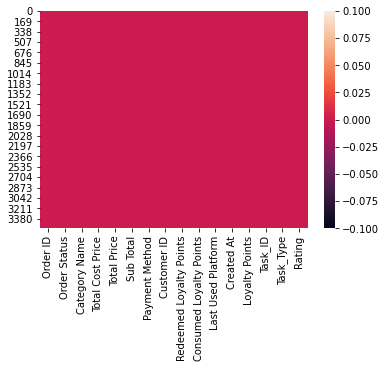

In [1749]:
sns.heatmap(nigeria.isnull())

In [1750]:
#Kenya data
#ko (Kenya Orders)
ko = pd.read_csv(r'C:\Users\Spectre\Downloads\Kenya Orders.csv')

#kenya customers
kc = pd.read_csv(r'C:\Users\Spectre\Downloads\Kenya Customers.csv')
kc = pd.DataFrame(kc)

#kd (Kenya Deliveries)
kd = pd.read_csv(r'C:\Users\Spectre\Downloads\Kenya Deliveries.csv')

C:\Users\Spectre\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [1751]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer ID                 4177 non-null   int64  
 1   Last Used Platform          4177 non-null   object 
 2   Is Blocked                  4177 non-null   int64  
 3   Created At                  4177 non-null   object 
 4   Language                    4177 non-null   object 
 5   Outstanding Amount          4177 non-null   int64  
 6   Loyalty Points              4177 non-null   int64  
 7   Number of employees         3139 non-null   float64
 8   Upload restuarant location  19 non-null     object 
dtypes: float64(1), int64(4), object(4)
memory usage: 293.8+ KB


In [1752]:
kc.head()

,Customer ID,Last Used Platform,Is Blocked,Created At,Language,Outstanding Amount,Loyalty Points,Number of employees,Upload restuarant location
0,3144837,WEB,0,2021-03-15T17:13:19.000Z,en,0,0,NaN,NaN
1,3174590,WEB,0,2021-03-20T14:15:11.000Z,en,0,0,NaN,NaN
2,3181998,WEB,0,2021-03-21T15:36:51.000Z,en,0,0,NaN,NaN
3,3191244,WEB,0,2021-03-23T08:54:00.000Z,en,0,367,NaN,NaN
4,3274222,WEB,0,2021-04-06T13:52:39.000Z,en,0,0,NaN,NaN


In [1753]:
kc.tail()

,Customer ID,Last Used Platform,Is Blocked,Created At,Language,Outstanding Amount,Loyalty Points,Number of employees,Upload restuarant location
4172,5188032,WEB,0,2022-02-17T09:03:10.000Z,en,0,0,NaN,NaN
4173,5188161,WEB,0,2022-02-17T09:31:49.000Z,en,0,0,NaN,NaN
4174,5188263,WEB,0,2022-02-17T09:51:36.000Z,en,0,0,NaN,NaN
4175,5188431,WEB,0,2022-02-17T10:34:19.000Z,en,0,0,1.0,NaN
4176,5189011,WEB,0,2022-02-17T13:07:11.000Z,en,0,0,NaN,NaN


In [1754]:
kc.describe()

,Customer ID,Is Blocked,Outstanding Amount,Loyalty Points,Number of employees
count,4.177000e+03,4177.000000,4177.0,4177.000000,3.139000e+03
mean,4.119152e+06,0.023222,0.0,58.490304,5.504071e+06
std,3.192675e+05,0.150627,0.0,260.459272,1.346578e+08
min,3.144837e+06,0.000000,0.0,0.000000,-2.000000e+00
25%,3.943318e+06,0.000000,0.0,0.000000,2.000000e+00
50%,4.060157e+06,0.000000,0.0,3.000000,2.000000e+00
75%,4.280927e+06,0.000000,0.0,41.000000,3.000000e+00
max,5.189011e+06,1.000000,0.0,8855.000000,7.034704e+09


In [1755]:
kc['Outstanding Amount'].value_counts()

0    4177
Name: Outstanding Amount, dtype: int64

In [1756]:
kc['Is Blocked'].value_counts()

0    4080
1      97
Name: Is Blocked, dtype: int64

In [1757]:
kc['Loyalty Points'].value_counts()

0       1551
3        574
2         88
21        62
4         58
        ... 
725        1
737        1
749        1
2800       1
1971       1
Name: Loyalty Points, Length: 389, dtype: int64

In [1758]:
kc['Upload restuarant location'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Upload restuarant location, dtype: object

In [1759]:
kc['Upload restuarant location'].value_counts()

[]                                                                                                            17
["https://yelodotred.s3.amazonaws.com/task_images/0j7e1626858464884-IMG2021072112070800.jpg"]                  1
["https://yelodotred.s3.amazonaws.com/task_images/mmne1626868129582-16268680951218708893508076224129.jpg"]     1
Name: Upload restuarant location, dtype: int64

<AxesSubplot:>

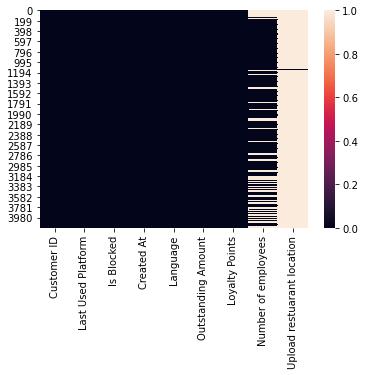

In [1760]:
sns.heatmap(kc.isnull())

In [1761]:
kc.columns

Index(['Customer ID', 'Last Used Platform', 'Is Blocked', 'Created At',
       'Language', 'Outstanding Amount', 'Loyalty Points',
       'Number of employees', 'Upload restuarant location'],
      dtype='object')

In [1762]:
#Data cleaning for kenya customers data

kc = kc.drop( 'Number of employees', axis = 1)

#To remove junk data that we won't use in our model we will remove the following columns(Is Blocked,Outstanding Amount and Upload restuarant location)
kc = kc.drop(['Is Blocked','Outstanding Amount','Upload restuarant location'], axis = 1)

#We can also remove the Language column
kc = kc.drop('Language', axis = 1)

In [1763]:
kc.columns

Index(['Customer ID', 'Last Used Platform', 'Created At', 'Loyalty Points'], dtype='object')

In [1764]:
ko.columns

Index(['Order ID', 'Order Status', 'Category Name', 'SKU',
       'Customization Group', 'Customization Option', 'Quantity', 'Unit Price',
       'Cost Price', 'Total Cost Price', 'Total Price', 'Order Total',
       'Sub Total', 'Tax', 'Delivery Charge', 'Tip', 'Discount',
       'Remaining Balance', 'Payment Method', 'Additional Charge',
       'Taxable Amount', 'Transaction ID', 'Currency Symbol',
       'Transaction Status', 'Promo Code', 'Customer ID', 'Merchant ID',
       'Store Name', 'Pickup Address', 'Description', 'Distance (in km)',
       'Order Time', 'Pickup Time', 'Delivery Time', 'Ratings', 'Reviews',
       'Merchant Earning', 'Commission Amount', 'Commission Payout Status',
       'Order Preparation Time', 'Debt Amount', 'Redeemed Loyalty Points',
       'Consumed Loyalty Points', 'Cancellation Reason', 'Flat Discount',
       'Checkout Template Name', 'Checkout Template Value'],
      dtype='object')

In [1765]:
ko.head()

,Order ID,Order Status,Category Name,SKU,Customization Group,Customization Option,Quantity,Unit Price,Cost Price,Total Cost Price,...,Commission Amount,Commission Payout Status,Order Preparation Time,Debt Amount,Redeemed Loyalty Points,Consumed Loyalty Points,Cancellation Reason,Flat Discount,Checkout Template Name,Checkout Template Value
0,11265015,ORDERED,Cooking Fat & Oil,KKCO0487,NaN,NaN,1,4400,4250,4250,...,NaN,NaN,0,-,50,-,NaN,0,-,-
1,11264651,ORDERED,Cleaning & Hygiene,KKPT280100,NaN,NaN,1,180,130,130,...,NaN,NaN,0,-,-,-,NaN,0,-,-
2,11264651,ORDERED,Flour & Sugar,KKFS0702,NaN,NaN,6,263,247,1482,...,NaN,NaN,0,-,-,-,NaN,0,-,-
3,11264651,ORDERED,Salt & Seasoning,KKSS0002,NaN,NaN,10,65,58,580,...,NaN,NaN,0,-,-,-,NaN,0,-,-
4,11264651,ORDERED,Beverages,KKBE0105,NaN,NaN,1,249,208.5,208.5,...,NaN,NaN,0,-,-,-,NaN,0,-,-


In [1766]:
ko['Order Status'].value_counts()

COMPLETED    11428
CANCELLED      755
ORDERED         59
Name: Order Status, dtype: int64

In [1767]:
ko['SKU'].value_counts()

KKSS0002     1024
KKCO0620      893
KKFS0222      598
KKFS0401      551
KKFS0702      539
             ... 
KKBE0206        1
KKCH02500       1
KKCH05500       1
KKCH01500       1
KKBE0402        1
Name: SKU, Length: 166, dtype: int64

In [1768]:
ko['Redeemed Loyalty Points'].value_counts()

-       4920
100      453
40       241
200      213
60       202
        ... 
132        1
197        1
208        1
426        1
1057       1
Name: Redeemed Loyalty Points, Length: 350, dtype: int64

In [1769]:
ko['Consumed Loyalty Points'].value_counts()

-       814
43      305
44      281
45      224
21      203
       ... 
199       1
398       1
1288      1
388       1
597       1
Name: Consumed Loyalty Points, Length: 377, dtype: int64

In [1770]:
ko['Cancellation Reason'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Cancellation Reason, dtype: float64

In [1771]:
ko['Cancellation Reason'].tail(30)

12212   NaN
12213   NaN
12214   NaN
12215   NaN
12216   NaN
12217   NaN
12218   NaN
12219   NaN
12220   NaN
12221   NaN
12222   NaN
12223   NaN
12224   NaN
12225   NaN
12226   NaN
12227   NaN
12228   NaN
12229   NaN
12230   NaN
12231   NaN
12232   NaN
12233   NaN
12234   NaN
12235   NaN
12236   NaN
12237   NaN
12238   NaN
12239   NaN
12240   NaN
12241   NaN
Name: Cancellation Reason, dtype: float64

In [1772]:
ko['Cancellation Reason'].value_counts()

Series([], Name: Cancellation Reason, dtype: int64)

In [1773]:
ko['Payment Method'].value_counts()

CASH         11361
Pay Later      881
Name: Payment Method, dtype: int64

In [1774]:
ko['Additional Charge'].value_counts()

-    12242
Name: Additional Charge, dtype: int64

In [1775]:
ko['Taxable Amount'].value_counts()

-    12242
Name: Taxable Amount, dtype: int64

In [1776]:
ko['Transaction Status'].value_counts()

Series([], Name: Transaction Status, dtype: int64)

In [1777]:
ko['Store Name'].value_counts()

Topup Mama    12242
Name: Store Name, dtype: int64

In [1778]:
ko['Remaining Balance'].value_counts()

0    12242
Name: Remaining Balance, dtype: int64

In [1779]:
ko['Description'].head(40)

0                                            NaN
1      Urgently deliver by 9.30am in the morning
2      Urgently deliver by 9.30am in the morning
3      Urgently deliver by 9.30am in the morning
4      Urgently deliver by 9.30am in the morning
5      Urgently deliver by 9.30am in the morning
6      Urgently deliver by 9.30am in the morning
7      Urgently deliver by 9.30am in the morning
8      Urgently deliver by 9.30am in the morning
9      Urgently deliver by 9.30am in the morning
10       Deliver on Saturday morning at 10.00a.m
11                                           NaN
12                                           NaN
13                                           NaN
14                                           NaN
15                                           NaN
16    Deliver tomorrow morning by 6.00a.m Latest
17    Deliver tomorrow morning by 6.00a.m Latest
18    Deliver tomorrow morning by 6.00a.m Latest
19    Deliver tomorrow morning by 6.00a.m Latest
20    Deliver tomorr

In [1780]:
ko['Reviews'].tail(50)

12192    NaN
12193    NaN
12194    NaN
12195    NaN
12196    NaN
12197    NaN
12198    NaN
12199    NaN
12200    NaN
12201    NaN
12202    NaN
12203    NaN
12204    NaN
12205    NaN
12206    NaN
12207    NaN
12208    NaN
12209    NaN
12210    NaN
12211    NaN
12212    NaN
12213    NaN
12214    NaN
12215    NaN
12216    NaN
12217    NaN
12218    NaN
12219    NaN
12220    NaN
12221    NaN
12222    NaN
12223    NaN
12224    NaN
12225    NaN
12226    NaN
12227    NaN
12228    NaN
12229    NaN
12230    NaN
12231    NaN
12232    NaN
12233    NaN
12234    NaN
12235    NaN
12236    NaN
12237    NaN
12238    NaN
12239    NaN
12240    NaN
12241    NaN
Name: Reviews, dtype: object

In [1781]:
#Remove junk columns
ko = ko.drop(['Customization Group','Customization Option','SKU','Unit Price','Cost Price','Merchant Earning','Commission Amount','Commission Payout Status','Order Preparation Time','Cancellation Reason','Flat Discount','Checkout Template Name','Checkout Template Value','Order Total', 'Tax',
       'Delivery Charge', 'Tip', 'Discount','Remaining Balance','Additional Charge','Taxable Amount','Transaction ID', 'Currency Symbol','Transaction Status','Promo Code','Merchant ID','Store Name', 'Pickup Address',
       'Description', 'Distance (in km)', 'Order Time', 'Pickup Time',
       'Delivery Time','Ratings', 'Reviews'], axis = 1)
ko.columns

Index(['Order ID', 'Order Status', 'Category Name', 'Quantity',
       'Total Cost Price', 'Total Price', 'Sub Total', 'Payment Method',
       'Customer ID', 'Debt Amount', 'Redeemed Loyalty Points',
       'Consumed Loyalty Points'],
      dtype='object')

In [1782]:
ko['Debt Amount'].value_counts()

-    12242
Name: Debt Amount, dtype: int64

In [1783]:
ko = ko.drop('Debt Amount', axis = 1)

In [1784]:
kd.columns

Index(['Task_ID', 'Order_ID', 'Relationship', 'Team_Name', 'Task_Type',
       'Notes', 'Agent_ID', 'Agent_Name', 'Distance(m)',
       'Total_Time_Taken(min)', 'Pick_up_From', 'Start_Before',
       'Complete_Before', 'Completion_Time', 'Task_Status', 'Ref_Images',
       'Rating', 'Review', 'Latitude', 'Longitude', 'Tags', 'Promo_Applied',
       'Custom_Template_ID', 'Task_Details_QTY', 'Task_Details_AMOUNT',
       'Special_Instructions', 'Tip', 'Delivery_Charges', 'Discount',
       'Subtotal', 'Payment_Type', 'Task_Category', 'Earning', 'Pricing',
       'Unnamed: 34', 'Unnamed: 35'],
      dtype='object')

In [1785]:
kd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44983 entries, 0 to 44982
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Task_ID                44983 non-null  int64  
 1   Order_ID               44983 non-null  object 
 2   Relationship           44983 non-null  float64
 3   Team_Name              44983 non-null  object 
 4   Task_Type              44983 non-null  object 
 5   Notes                  13873 non-null  object 
 6   Agent_ID               44983 non-null  object 
 7   Agent_Name             44983 non-null  object 
 8   Distance(m)            44983 non-null  object 
 9   Total_Time_Taken(min)  44983 non-null  object 
 10  Pick_up_From           44983 non-null  object 
 11  Start_Before           44983 non-null  object 
 12  Complete_Before        44983 non-null  object 
 13  Completion_Time        44983 non-null  object 
 14  Task_Status            44983 non-null  object 
 15  Re

In [1786]:
kd.head()

,Task_ID,Order_ID,Relationship,Team_Name,Task_Type,Notes,Agent_ID,Agent_Name,Distance(m),Total_Time_Taken(min),...,Tip,Delivery_Charges,Discount,Subtotal,Payment_Type,Task_Category,Earning,Pricing,Unnamed: 34,Unnamed: 35
0,368110390,"YR-11265216,0",3.681104e+29,Default Team,Delivery,NaN,-,-,-,-,...,-,-,-,-,-,-,-,-,NaN,NaN
1,368110390,"YR-11265216,0",3.681104e+29,Default Team,Delivery,NaN,-,-,-,-,...,KSh 0.00,KSh 0.00,KSh 0.00,4700,CASH,-,-,-,NaN,NaN
2,368109621,"YR-11265175,0",3.681096e+29,Default Team,Delivery,NaN,-,-,-,-,...,KSh 0.00,KSh 0.00,KSh 400.00,19500,CASH,-,-,-,NaN,NaN
3,368105817,"YR-11265015,0",3.681058e+29,Default Team,Delivery,NaN,-,-,-,-,...,KSh 0.00,KSh 0.00,KSh 50.00,4350,CASH,-,-,-,NaN,NaN
4,368098308,"YR-11264651,0",3.680983e+29,Default Team,Delivery,Urgently deliver by 9.30am in the morning,-,-,-,-,...,-,-,-,-,-,-,-,-,NaN,NaN


In [1787]:
kd['Task_Type'].value_counts()

Delivery    44982
Pick-up         1
Name: Task_Type, dtype: int64

<AxesSubplot:xlabel='Task_Type', ylabel='count'>

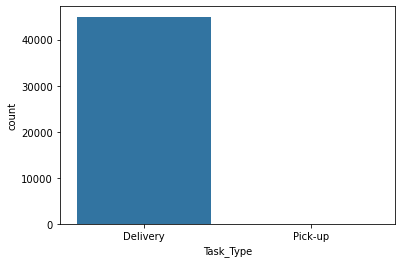

In [1788]:
sns.countplot(x='Task_Type', data = kd)

In [1789]:
kd['Order_ID'] = kd['Order_ID'].str.strip('-').str[3:11]
kd['Order_ID']

0        11265216
1        11265216
2        11265175
3        11265015
4        11264651
           ...   
44978    5319666,
44979    5304830,
44980    5304690,
44981    5304690,
44982    5304690,
Name: Order_ID, Length: 44983, dtype: object

In [1790]:
kd['Notes'].value_counts()

Deliver tomorrow morning by 6.00a.m          851
Kindly deliver at 6am                        502
Urgently deliver by 6.00am in the morning    469
Deliver tomorrow morning by 7.00a.m          337
Deliver early by 6am                         336
                                            ... 
To be delivered by 7 am without fail.          1
Deliver at 9                                   1
Deliver tomorrow morning before 12pm           1
Deliver very early by 6.45am                   1
Kahawa Wendani near Maguna Supermarket         1
Name: Notes, Length: 2227, dtype: int64

In [1791]:
kd['Team_Name'].value_counts()

Default Team    44983
Name: Team_Name, dtype: int64

In [1792]:
kd['Task_Status'].value_counts()

Completed                  40067
Cancelled                   2897
Failed                      1838
Unassigned                    71
07 Feb 2022 08:44:31 am       21
15 Nov 2021 08:39:19 am       11
29 Jan 2022 07:08:31 am        5
19 Oct 2021 07:45:03 am        4
07 Oct 2021 06:31:06 am        4
02 Feb 2022 06:44:51 am        4
19 Aug 2021 05:57:49 am        4
20 Jul 2021 07:24:46 am        3
07 Jan 2022 07:55:28 am        3
20 Jul 2021 10:25:20 am        3
27 Aug 2021 05:47:56 am        3
01 Aug 2021 07:50:15 am        2
15 Jul 2021 06:50:09 am        2
22 Oct 2021 07:52:09 am        2
28 Jul 2021 06:45:59 am        2
28 Aug 2021 05:56:30 am        2
02 Nov 2021 08:19:11 pm        2
25 Aug 2021 09:05:47 am        2
18 Jan 2022 07:59:25 am        2
23 Jul 2021 07:20:00 am        2
01 Aug 2021 08:07:15 am        2
01 Aug 2021 07:21:28 am        2
26 Aug 2021 09:42:40 pm        2
17 Jan 2022 03:59:28 pm        2
19 Jul 2021 06:43:51 am        2
20 Aug 2021 06:54:53 am        2
21 Jul 202

In [1793]:
kd['Rating'].value_counts()

0    44780
-      109
5       90
1        4
Name: Rating, dtype: int64

<AxesSubplot:xlabel='Rating', ylabel='count'>

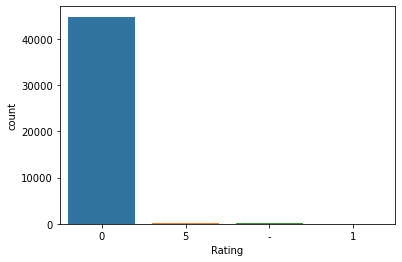

In [1794]:
sns.countplot(x ='Rating', data = kd)

In [1795]:
kd['Review'].value_counts()

-                                                                                                                             44799
0                                                                                                                               109
Good                                                                                                                             13
Herman Atsiaya is doing a very good job, very polite and pantual, tell him to keep it up.                                         5
Good delivery.                                                                                                                    5
John Wachira is the best driver. Always keeps time                                                                                4
Panctual.                                                                                                                         4
Delivery on time. Good relations.                                           

In [1796]:
kd['Payment_Type'].value_counts()

-                                                      24379
CASH                                                   20313
Pay Later                                                190
KSh 0.00                                                  24
paybill                                                   10
Paybill                                                    7
mpesa                                                      7
PAYBILL                                                    7
To pay later                                               6
To pay later.                                              2
CASH 4000 Bal 1489                                         1
CASH 2610 paybill 1000                                     1
Not paid                                                   1
CASH 400 mpesa 1400                                        1
CASH298 Paybill 2100                                       1
KSh 569.85                                                 1
To pay later on paybill 

In [1797]:
#Remove Junk columns
kd = kd.drop(['Relationship','Team_Name','Notes','Agent_ID','Distance(m)','Total_Time_Taken(min)','Pick_up_From','Start_Before', 'Complete_Before', 'Completion_Time','Task_Status', 'Ref_Images','Review','Latitude',
       'Longitude', 'Tags', 'Promo_Applied', 'Custom_Template_ID',
       'Task_Details_QTY', 'Task_Details_AMOUNT', 'Special_Instructions',
       'Tip', 'Delivery_Charges', 'Discount', 'Subtotal', 'Payment_Type',
       'Task_Category', 'Earning', 'Pricing' ],axis = 1)

In [1798]:
kd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44983 entries, 0 to 44982
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Task_ID      44983 non-null  int64 
 1   Order_ID     44983 non-null  object
 2   Task_Type    44983 non-null  object
 3   Agent_Name   44983 non-null  object
 4   Rating       44983 non-null  object
 5   Unnamed: 34  109 non-null    object
 6   Unnamed: 35  39 non-null     object
dtypes: int64(1), object(6)
memory usage: 2.4+ MB


In [1799]:
kd = kd.drop(['Unnamed: 34','Unnamed: 35'], axis = 1)

In [1800]:
kd.columns

Index(['Task_ID', 'Order_ID', 'Task_Type', 'Agent_Name', 'Rating'], dtype='object')

In [1801]:
ko.columns

C:\Users\Spectre\anaconda3\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


Index(['Order ID', 'Order Status', 'Category Name', 'Quantity',
       'Total Cost Price', 'Total Price', 'Sub Total', 'Payment Method',
       'Customer ID', 'Redeemed Loyalty Points', 'Consumed Loyalty Points'],
      dtype='object')

In [1802]:
kc.columns

Index(['Customer ID', 'Last Used Platform', 'Created At', 'Loyalty Points'], dtype='object')

In [1803]:
ko_kc = ko.merge(kc,on='Customer ID')

In [1804]:
kd.columns

Index(['Task_ID', 'Order_ID', 'Task_Type', 'Agent_Name', 'Rating'], dtype='object')

In [1805]:
kd['Order_ID'] = kd['Order_ID'].convert_dtypes('int64')
kd['Order_ID']

0        11265216
1        11265216
2        11265175
3        11265015
4        11264651
           ...   
44978    5319666,
44979    5304830,
44980    5304690,
44981    5304690,
44982    5304690,
Name: Order_ID, Length: 44983, dtype: string

In [1806]:
ko_kc['Order_ID']=no_nc['Order_ID'].astype(str)

In [1807]:
ko_kc_kd = no_nc.merge(nd, on='Order_ID')

In [1808]:
ko_kc_kd.columns

Index(['Order ID', 'Order Status', 'Category Name', 'Total Cost Price',
       'Total Price', 'Sub Total', 'Payment Method', 'Customer ID',
       'Redeemed Loyalty Points', 'Consumed Loyalty Points',
       'Last Used Platform', 'Created At', 'Loyalty Points', 'Order_ID',
       'Task_ID', 'Task_Type', 'Rating'],
      dtype='object')

In [1809]:
ko_kc_kd = ko_kc_kd.drop('Order_ID', axis = 1)

In [1810]:
kenya = ko_kc_kd

In [1811]:
kenya.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3537 entries, 0 to 3536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Order ID                 3537 non-null   int64 
 1   Order Status             3537 non-null   object
 2   Category Name            3537 non-null   object
 3   Total Cost Price         3537 non-null   int64 
 4   Total Price              3537 non-null   int64 
 5   Sub Total                3537 non-null   int64 
 6   Payment Method           3537 non-null   object
 7   Customer ID              3537 non-null   int64 
 8   Redeemed Loyalty Points  3537 non-null   object
 9   Consumed Loyalty Points  3537 non-null   object
 10  Last Used Platform       3537 non-null   object
 11  Created At               3537 non-null   object
 12  Loyalty Points           3537 non-null   int64 
 13  Task_ID                  3537 non-null   int64 
 14  Task_Type                3537 non-null  

In [1812]:
nigeria.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3537 entries, 0 to 3536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Order ID                 3537 non-null   int64 
 1   Order Status             3537 non-null   object
 2   Category Name            3537 non-null   object
 3   Total Cost Price         3537 non-null   int64 
 4   Total Price              3537 non-null   int64 
 5   Sub Total                3537 non-null   int64 
 6   Payment Method           3537 non-null   object
 7   Customer ID              3537 non-null   int64 
 8   Redeemed Loyalty Points  3537 non-null   object
 9   Consumed Loyalty Points  3537 non-null   object
 10  Last Used Platform       3537 non-null   object
 11  Created At               3537 non-null   object
 12  Loyalty Points           3537 non-null   int64 
 13  Task_ID                  3537 non-null   int64 
 14  Task_Type                3537 non-null  

In [1813]:
Topupmama = pd.concat((kenya,nigeria),axis = 0)

In [1814]:
Topupmama.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7074 entries, 0 to 3536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Order ID                 7074 non-null   int64 
 1   Order Status             7074 non-null   object
 2   Category Name            7074 non-null   object
 3   Total Cost Price         7074 non-null   int64 
 4   Total Price              7074 non-null   int64 
 5   Sub Total                7074 non-null   int64 
 6   Payment Method           7074 non-null   object
 7   Customer ID              7074 non-null   int64 
 8   Redeemed Loyalty Points  7074 non-null   object
 9   Consumed Loyalty Points  7074 non-null   object
 10  Last Used Platform       7074 non-null   object
 11  Created At               7074 non-null   object
 12  Loyalty Points           7074 non-null   int64 
 13  Task_ID                  7074 non-null   int64 
 14  Task_Type                7074 non-null  

In [1815]:
sum_unit_price =np.sum (Topupmama['Total Price'])
sum_cost_price = np.sum(Topupmama['Total Cost Price'])

Topupmama['Grossmargin'] = ((sum_unit_price-sum_cost_price)/sum_unit_price)*100

In [1816]:
Grossmargin

3.70144877604508

In [1817]:
no_customers = Topupmama['Customer ID'].nunique()
no_customers

152

In [1818]:
Topupmama['Order ID'].count()

7074

In [1819]:
order_frequency =(Topupmama['Order ID'].count())/no_customers
order_frequency

46.53947368421053

In [1820]:
avg_order_value = Topupmama['Sub Total']/(Topupmama['Order ID'].count())
avg_order_value

0       14.783008
1       14.783008
2       14.783008
3       14.783008
4       29.474131
          ...    
3532     1.364150
3533     1.364150
3534     1.364150
3535     0.947130
3536     0.593723
Name: Sub Total, Length: 7074, dtype: float64

In [1821]:
Topupmama['net_revenue'] = no_customers*order_frequency*avg_order_value*Grossmargin
Topupmama['net_revenue']

0       387079.005755
1       387079.005755
2       387079.005755
3       387079.005755
4       771752.069805
            ...      
3532     35718.980689
3533     35718.980689
3534     35718.980689
3535     24799.706800
3536     15546.084859
Name: net_revenue, Length: 7074, dtype: float64

# EDA 

In [1822]:
Topupmama.columns

Index(['Order ID', 'Order Status', 'Category Name', 'Total Cost Price',
       'Total Price', 'Sub Total', 'Payment Method', 'Customer ID',
       'Redeemed Loyalty Points', 'Consumed Loyalty Points',
       'Last Used Platform', 'Created At', 'Loyalty Points', 'Task_ID',
       'Task_Type', 'Rating', 'Grossmargin', 'net_revenue'],
      dtype='object')

<AxesSubplot:>

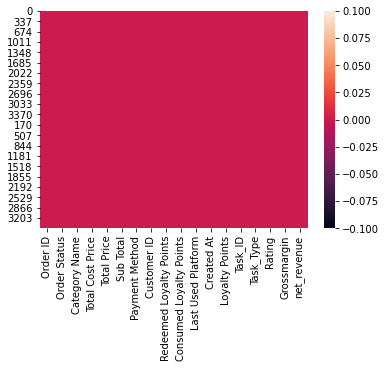

In [1823]:
sns.heatmap(Topupmama.isnull())

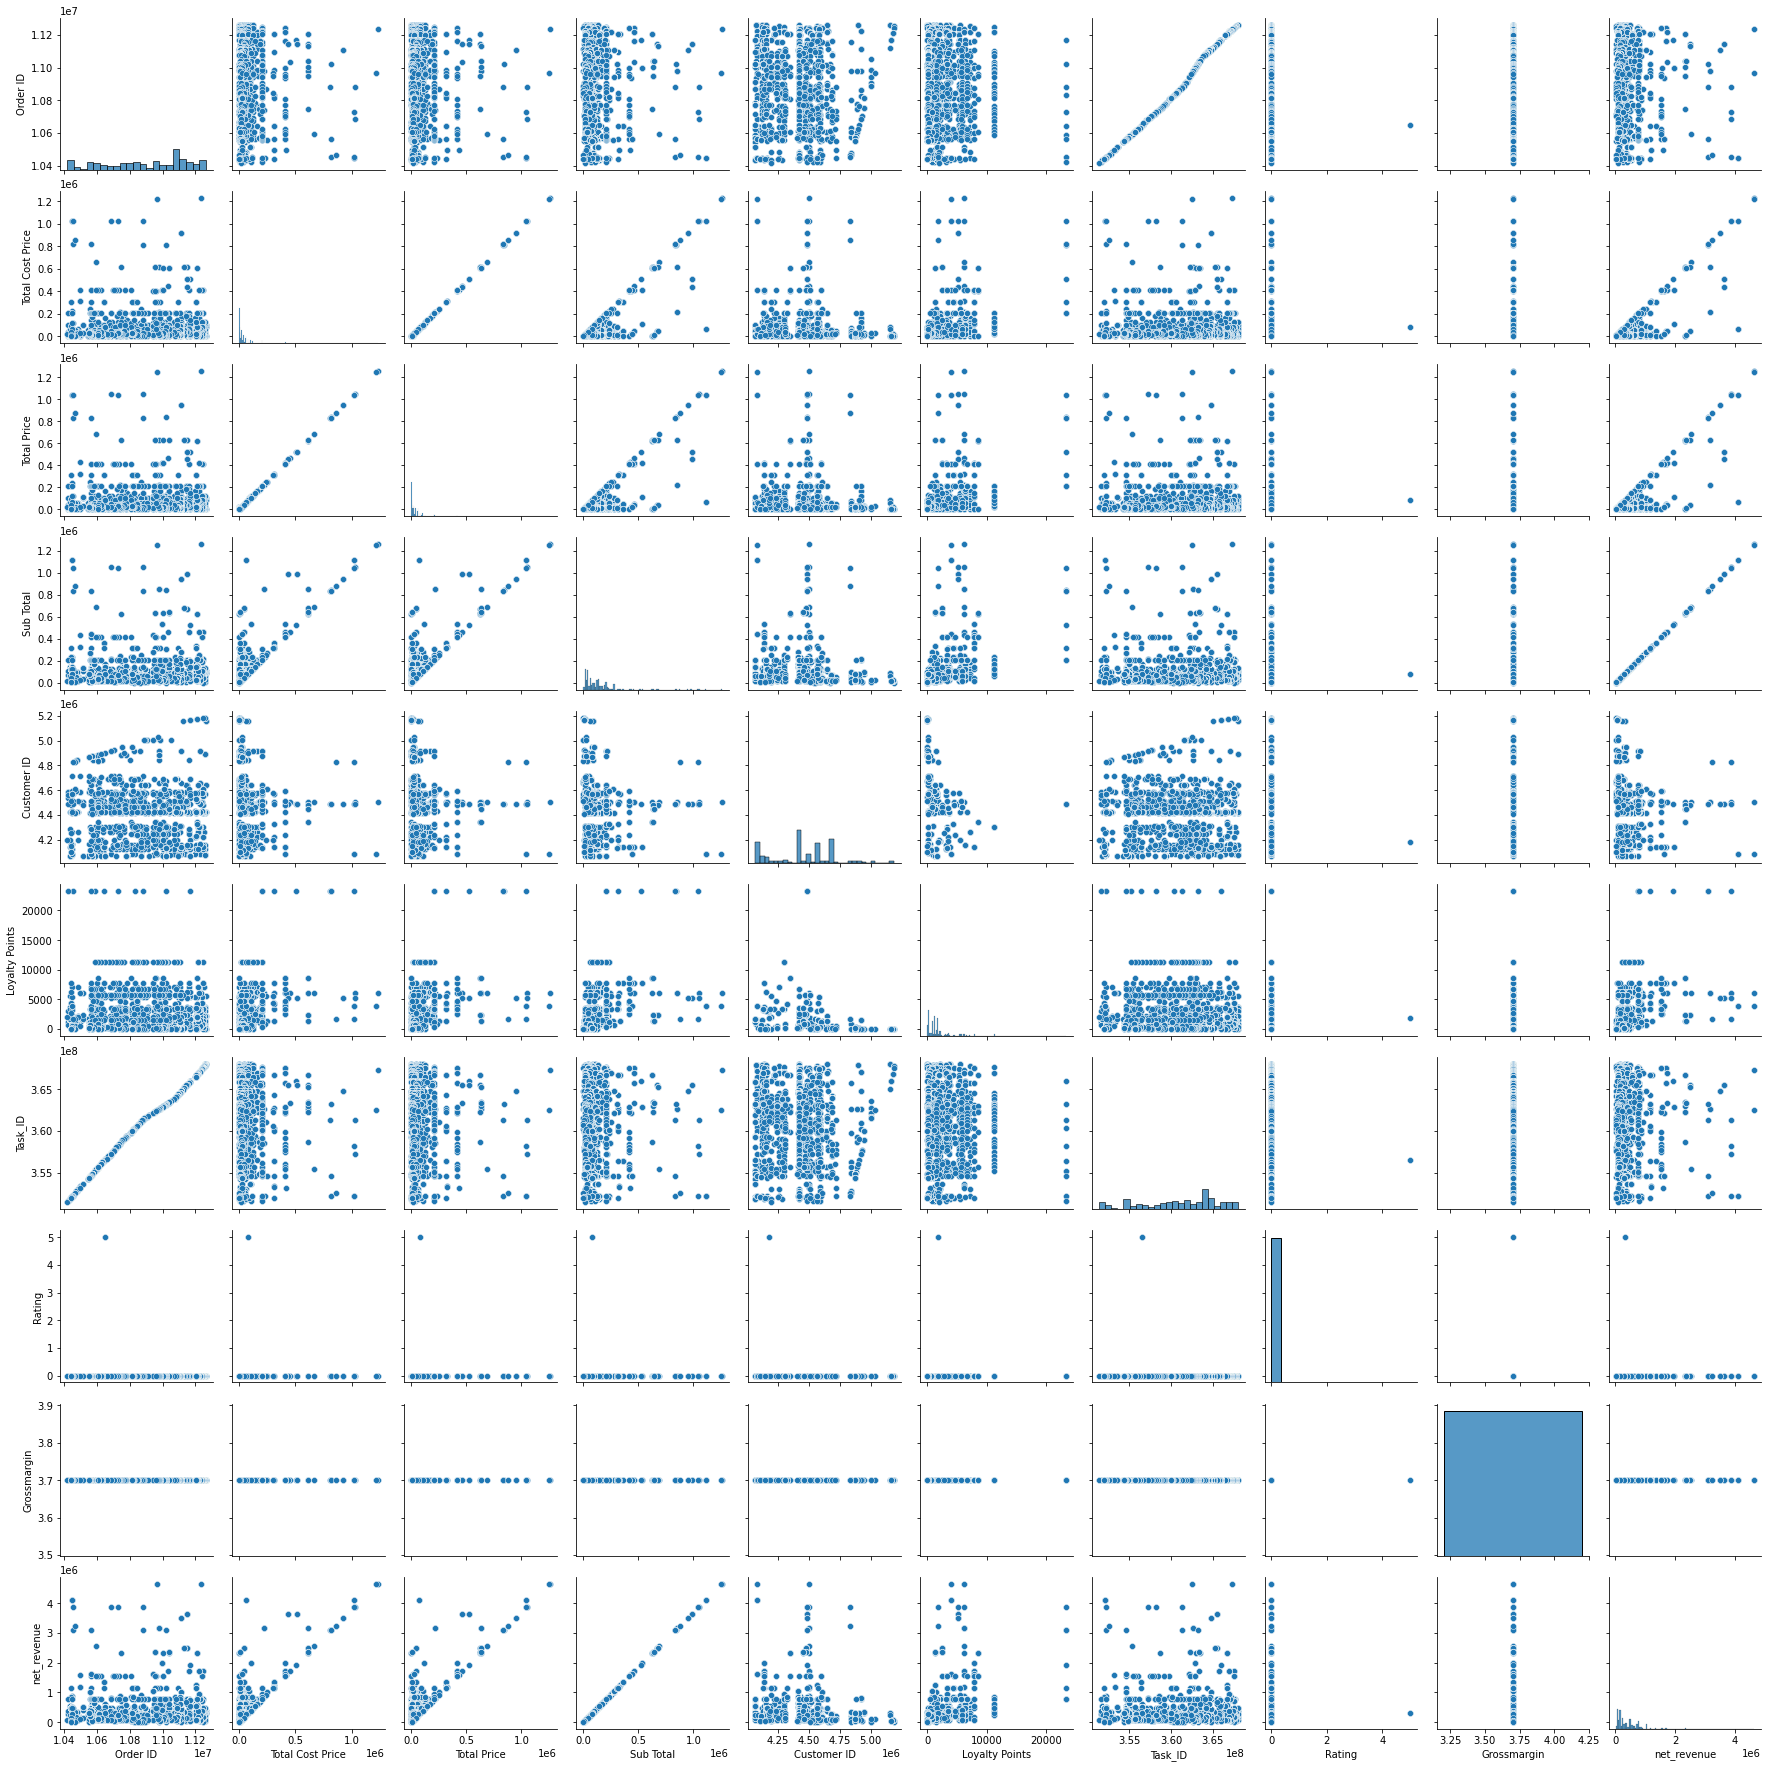

In [1824]:
sns.pairplot(Topupmama)

<AxesSubplot:xlabel='Category Name', ylabel='net_revenue'>

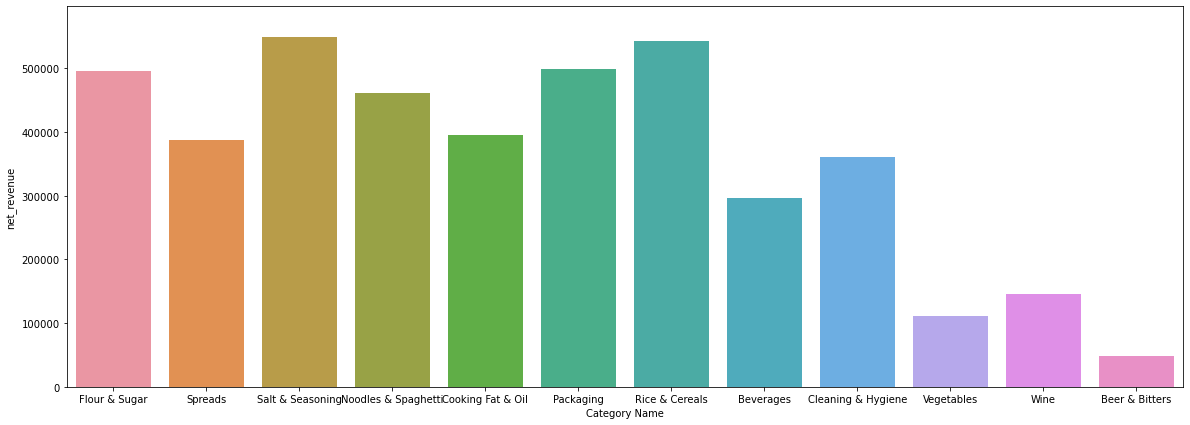

In [1825]:
plt.figure(figsize=(20,7))
sns.barplot(x = 'Category Name', y = 'net_revenue', data = Topupmama,errwidth=False)

From our data we can tell that most of the revenue comes from Salt and seasonings, Rice and cereals,Flour and sugar and packaging.

On the other hand Beef and Bitters , vegetables and wine aint doing very well in the market.

<AxesSubplot:xlabel='Category Name', ylabel='net_revenue'>

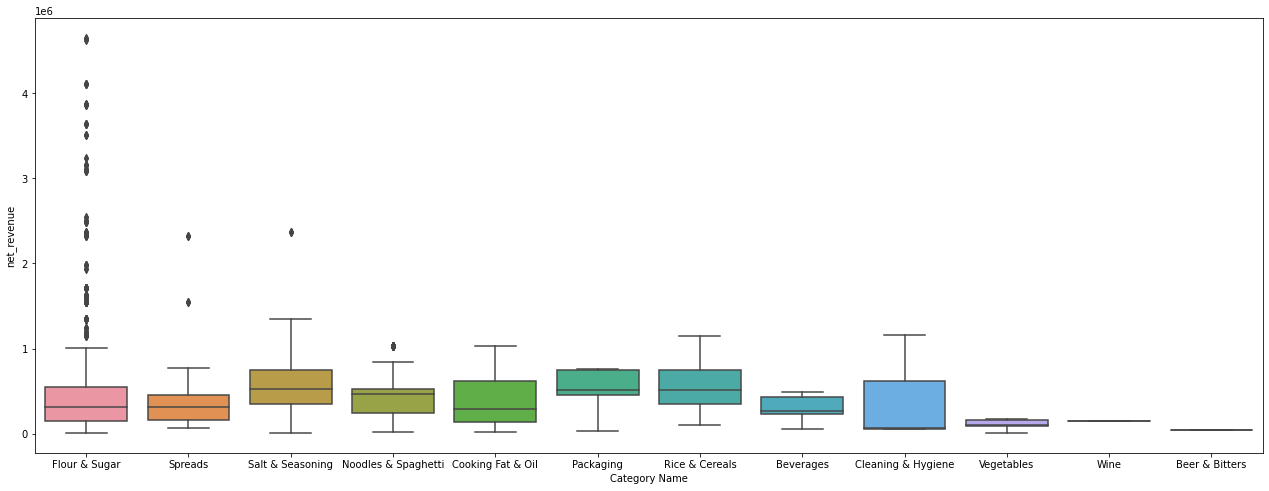

In [1870]:
plt.figure(figsize=(22,8))
sns.boxplot(x = 'Category Name', y = 'net_revenue', data= Topupmama)

We have quite a number of outliers in the flour and sugar category meaning there are some items in the flour and sugar category that are so pricy

# MACHINE LEARNING ALGORITHMS

# REVENUE OPTIMIZATION

We will use a Linear Regression model to determine on what aspects we need to put in place to optimize revenue generation for the company

# TRAIN TEST SPLIT

In [1826]:
from sklearn.model_selection import train_test_split

In [1827]:
Topupmama.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7074 entries, 0 to 3536
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Order ID                 7074 non-null   int64  
 1   Order Status             7074 non-null   object 
 2   Category Name            7074 non-null   object 
 3   Total Cost Price         7074 non-null   int64  
 4   Total Price              7074 non-null   int64  
 5   Sub Total                7074 non-null   int64  
 6   Payment Method           7074 non-null   object 
 7   Customer ID              7074 non-null   int64  
 8   Redeemed Loyalty Points  7074 non-null   object 
 9   Consumed Loyalty Points  7074 non-null   object 
 10  Last Used Platform       7074 non-null   object 
 11  Created At               7074 non-null   object 
 12  Loyalty Points           7074 non-null   int64  
 13  Task_ID                  7074 non-null   int64  
 14  Task_Type               

In [1828]:
X = Topupmama[['Total Cost Price','Total Price','Sub Total','Grossmargin']]
y = Topupmama['net_revenue']

In [1829]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# TRAINING THE MODEL

In [1830]:
from sklearn.linear_model import LinearRegression

In [1831]:
lm = LinearRegression()

In [1832]:
lm.fit(X_train,y_train)

LinearRegression()

**Print out the coefficients of the model**

In [1833]:
lm.coef_

array([ 2.58223840e-14, -2.71280074e-14,  3.70144878e+00,  4.12894860e-37])

# PREDICTING TEST DATA

Now that we have fit our model, let's evaluate its performance by predicting off the test values!

In [1834]:
predict = lm.predict(X_test)

Scatterplot of the real test values and the predicted values

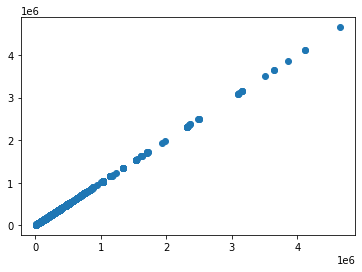

In [1835]:
plt.scatter(y_test,predict)

# Evaluating the Model
Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).


In [1836]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [1837]:
print(mean_absolute_error(y_test, predict))
print('\n')
print(mean_squared_error(y_test,predict))
print('\n')
print(np.sqrt(mean_squared_error(y_test,predict)))

9.497729362810256e-11


3.413554092236992e-20


1.8475806050716683e-10


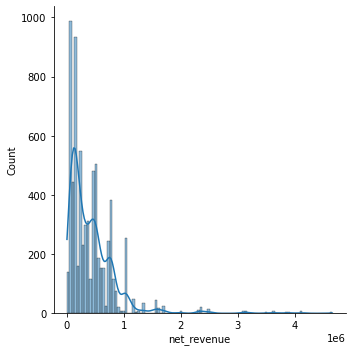

In [1838]:
sns.displot(x = 'net_revenue', data = Topupmama,kde = True)

In [1839]:
coeff = pd.DataFrame(lm.coef_,X.columns,columns=['coefficients'])
coeff

,coefficients
Total Cost Price,2.582238e-14
Total Price,-2.712801e-14
Sub Total,3.701449e+00
Grossmargin,4.128949e-37


Holding all other features constant 1 unit increase in Total Cost Price is associated with $2.582238e-14

Holding all other features constant 1 unit increase in Total Price is associated with $-2.712801e-14

Holding all other features constant 1 unit increase in Sub Total is associated with $3.701449e+00

Holding all other features constant 1 unit increase in Grossmargin is associated with $4.128949e-37

# CUSTOMER RETENTION

For customer retention we can build a logistic regression model based on the order status column to see how many customers we have retained by completing their order and how many cancelled their order.

In [1840]:
Topupmama['Order Status'].value_counts()

COMPLETED     5500
CANCELLED     1306
ORDERED        250
DISPATCHED      18
Name: Order Status, dtype: int64

In [1841]:
 Topupmama[['CANCELLED','DISPATCHED','ORDERED']]=pd.get_dummies(Topupmama['Order Status'], drop_first=True)

# TRAIN TEST SPLIT

In [1842]:
Topupmama.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7074 entries, 0 to 3536
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Order ID                 7074 non-null   int64  
 1   Order Status             7074 non-null   object 
 2   Category Name            7074 non-null   object 
 3   Total Cost Price         7074 non-null   int64  
 4   Total Price              7074 non-null   int64  
 5   Sub Total                7074 non-null   int64  
 6   Payment Method           7074 non-null   object 
 7   Customer ID              7074 non-null   int64  
 8   Redeemed Loyalty Points  7074 non-null   object 
 9   Consumed Loyalty Points  7074 non-null   object 
 10  Last Used Platform       7074 non-null   object 
 11  Created At               7074 non-null   object 
 12  Loyalty Points           7074 non-null   int64  
 13  Task_ID                  7074 non-null   int64  
 14  Task_Type               

In [1843]:
Topupmama.head()

,Order ID,Order Status,Category Name,Total Cost Price,Total Price,Sub Total,Payment Method,Customer ID,Redeemed Loyalty Points,Consumed Loyalty Points,...,Created At,Loyalty Points,Task_ID,Task_Type,Rating,Grossmargin,net_revenue,COMPLETED,DISPATCHED,ORDERED
0,11262518,ORDERED,Flour & Sugar,101850,104250,104575,CASH,4645484,-,-,...,2021-12-02T20:39:27.000Z,2202,368032956,Delivery,0,3.701449,387079.005755,0,0,1
1,11262518,ORDERED,Flour & Sugar,101850,104250,104575,CASH,4645484,-,-,...,2021-12-02T20:39:27.000Z,2202,368032956,Delivery,0,3.701449,387079.005755,0,0,1
2,11262518,ORDERED,Spreads,300,325,104575,CASH,4645484,-,-,...,2021-12-02T20:39:27.000Z,2202,368032956,Delivery,0,3.701449,387079.005755,0,0,1
3,11262518,ORDERED,Spreads,300,325,104575,CASH,4645484,-,-,...,2021-12-02T20:39:27.000Z,2202,368032956,Delivery,0,3.701449,387079.005755,0,0,1
4,11148290,COMPLETED,Flour & Sugar,203700,208500,208500,CASH,4645484,-,417,...,2021-12-02T20:39:27.000Z,2202,365593342,Delivery,0,3.701449,771752.069805,1,0,0


In [1844]:
from sklearn.model_selection import train_test_split
X = Topupmama[['Total Cost Price','Total Price','Sub Total']]
y = Topupmama['COMPLETED']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [1845]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [1846]:
predictions = log.predict(X_test)

In [1847]:
from sklearn.metrics import classification_report, confusion_matrix

In [1848]:
print(confusion_matrix(y_test,rfc_pred))

[[ 405   72]
 [  46 1600]]


In [1849]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87       477
           1       0.96      0.97      0.96      1646

    accuracy                           0.94      2123
   macro avg       0.93      0.91      0.92      2123
weighted avg       0.94      0.94      0.94      2123



We have a good model that has an accuracy of 0.94. It is evident that due to high completed orders we are able to retain most of our clients

# CLASSIFYING CUSTOMERS

This is an unsupervised machine learning algorithm. We will use the K-means cluster to carry out this task. We will classify our customers based on the payment method they use

# K Means Cluster Creation

In [1850]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(Topupmama[['Total Cost Price','Total Price','Sub Total']])

KMeans(n_clusters=4)

In [1851]:
kmeans.cluster_centers_

array([[244791.62303665, 250651.04712042, 296947.90575916],
       [ 19968.15349544,  20924.9366768 ,  47740.81813576],
       [751661.14285714, 770862.85714286, 849597.14285714],
       [ 33883.12640239,  35666.82872102, 177668.36200449]])

In [1852]:
kmeans.labels_

array([3, 3, 1, ..., 1, 1, 1])

There is no perfect way to evaluate clustering since we don't have the labels

# PRODUCT RECOMMENDATION

In [1853]:
Topupmama.columns

Index(['Order ID', 'Order Status', 'Category Name', 'Total Cost Price',
       'Total Price', 'Sub Total', 'Payment Method', 'Customer ID',
       'Redeemed Loyalty Points', 'Consumed Loyalty Points',
       'Last Used Platform', 'Created At', 'Loyalty Points', 'Task_ID',
       'Task_Type', 'Rating', 'Grossmargin', 'net_revenue', 'COMPLETED',
       'DISPATCHED', 'ORDERED'],
      dtype='object')

In [1854]:
Topupmama['Category Name'].value_counts()

Flour & Sugar          2536
Salt & Seasoning        890
Vegetables              832
Rice & Cereals          820
Cooking Fat & Oil       778
Noodles & Spaghetti     404
Packaging               298
Beverages               238
Spreads                 234
Cleaning & Hygiene       22
Beer & Bitters           18
Wine                      4
Name: Category Name, dtype: int64

In [1855]:
Topupmama[['Salt & Seasoning','Vegetables','Rice & Cereals','Cooking Fat & Oil','Noodles & Spaghetti','Packaging','Beverages','Spreads','Cleaning & Hygiene','Beer & Bitters','Wine']] = pd.get_dummies(Topupmama['Category Name'],drop_first=True)

In [1856]:
Topupmama.columns

Index(['Order ID', 'Order Status', 'Category Name', 'Total Cost Price',
       'Total Price', 'Sub Total', 'Payment Method', 'Customer ID',
       'Redeemed Loyalty Points', 'Consumed Loyalty Points',
       'Last Used Platform', 'Created At', 'Loyalty Points', 'Task_ID',
       'Task_Type', 'Rating', 'Grossmargin', 'net_revenue', 'COMPLETED',
       'DISPATCHED', 'ORDERED', 'Salt & Seasoning', 'Vegetables',
       'Rice & Cereals', 'Cooking Fat & Oil', 'Noodles & Spaghetti',
       'Packaging', 'Beverages', 'Spreads', 'Cleaning & Hygiene',
       'Beer & Bitters', 'Wine'],
      dtype='object')

In [1857]:
Topupmama['Category Name']

0             Flour & Sugar
1             Flour & Sugar
2                   Spreads
3                   Spreads
4             Flour & Sugar
               ...         
3532    Noodles & Spaghetti
3533    Noodles & Spaghetti
3534    Noodles & Spaghetti
3535    Noodles & Spaghetti
3536      Cooking Fat & Oil
Name: Category Name, Length: 7074, dtype: object

In [1859]:
from sklearn.model_selection import train_test_split
X = Topupmama[['Salt & Seasoning', 'Vegetables', 'Rice & Cereals', 'Cooking Fat & Oil',
       'Noodles & Spaghetti', 'Packaging', 'Beverages', 'Spreads',
       'Cleaning & Hygiene', 'Beer & Bitters', 'Wine']]
y = Topupmama['net_revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [1860]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [1861]:
predictions = lm.predict(X_test)

In [1862]:
lm.coef_

array([250592.88921459, 464077.55268024, 356773.98169918, 457809.87027981,
       409648.38703279, 444839.18854291, 490481.82956848, 499561.10661523,
       373385.44793718,  62513.52818478,  96607.81305478])

In [1863]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [1864]:
print(mean_absolute_error(y_test,predictions))
print('\n')
print(mean_squared_error(y_test,predictions))
print('\n')
print(np.sqrt(mean_squared_error(y_test,predictions)))

254602.01604593042


169782698626.34622


412046.96167590684


In [1865]:
coefficients = pd.DataFrame(lm.coef_,X.columns,columns=['coefficients'])
coefficients

,coefficients
Salt & Seasoning,250592.889215
Vegetables,464077.552680
Rice & Cereals,356773.981699
Cooking Fat & Oil,457809.870280
Noodles & Spaghetti,409648.387033
Packaging,444839.188543
Beverages,490481.829568
Spreads,499561.106615
Cleaning & Hygiene,373385.447937
Beer & Bitters,62513.528185


Holding all other features constant 1 unit increase in Salt & Seasoning is associated with $250592.889215

Holding all other features constant 1 unit increase in Vegetables is associated with $464077.552680

Holding all other features constant 1 unit increase in Rice & Cereals is associated with $356773.981699

Holding all other features constant 1 unit increase in Cooking Fat & Oil is associated with $457809.870280

Holding all other features constant 1 unit increase in Noodles & Spaghetti is associated with $409648.387033

Holding all other features constant 1 unit increase in Packaging is associated with $444839.188543

Holding all other features constant 1 unit increase in Beverages is associated with $490481.829568

Holding all other features constant 1 unit increase in Spreads is associated with $499561.106615

Holding all other features constant 1 unit increase in Cleaning & Hygiene is associated with $373385.447937

Holding all other features constant 1 unit increase in Beer & Bitters is associated with $62513.528185

Holding all other features constant 1 unit increase in Wine is associated with $96607.813055



For product recommendation - the company gets most of its revenue from spreads,Noodles & Spaghetti and Vegetables. Most investment hence should be on these products.


# Save our Dataset

In [1871]:
Topupmama.to_csv('TopUp Mama.csv')